## Play around with weekday modification co's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("data-kDl1L.csv",parse_dates=True)

In [3]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

In [4]:
df.set_index("Date",inplace=True)

In [5]:
df = df.asfreq('D')

In [6]:
df

,Statewide total,Oahu,Hawaii island,Maui,Kauai,Molokai,Outside Hawaii
Date,,,,,,,
2020-03-06,1,1,0,0,0,0,0
2020-03-07,0,0,0,0,0,0,0
2020-03-08,1,1,0,0,0,0,0
2020-03-09,0,0,0,0,0,0,0
2020-03-10,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2020-09-22,63,55,8,0,0,0,0
2020-09-23,168,154,13,1,0,0,0
2020-09-24,90,81,6,2,0,0,2


In [7]:
df["Oahu_Corrected"] = df["Oahu"]

In [8]:
df["weekday"] = df.index.weekday

In [9]:
df["weekday"].tail()

Date
2020-09-22    1
2020-09-23    2
2020-09-24    3
2020-09-25    4
2020-09-26    5
Freq: D, Name: weekday, dtype: int64

In [10]:
pConst = 1
df.loc[df.weekday == 0, 'Oahu_Corrected'] = df.loc[df.weekday == 0,"Oahu"] / (0.527020 * pConst)
df.loc[df.weekday == 1, 'Oahu_Corrected'] = df.loc[df.weekday == 1,"Oahu"] / (0.753109 * pConst)
df.loc[df.weekday == 2, 'Oahu_Corrected'] = df.loc[df.weekday == 2,"Oahu"] / (1.320610 * pConst)
df.loc[df.weekday == 3, 'Oahu_Corrected'] = df.loc[df.weekday == 3,"Oahu"] / (1.029350 * pConst)
df.loc[df.weekday == 4, 'Oahu_Corrected'] = df.loc[df.weekday == 4,"Oahu"] / (1.232490 * pConst)
df.loc[df.weekday == 5, 'Oahu_Corrected'] = df.loc[df.weekday == 5,"Oahu"] / (1.057817 * pConst)
df.loc[df.weekday == 6, 'Oahu_Corrected'] = df.loc[df.weekday == 6,"Oahu"] / (0.840926 * pConst)

In [11]:
df[["Oahu","Oahu_Corrected","weekday"]].tail(14)

,Oahu,Oahu_Corrected,weekday
Date,,,
2020-09-13,96,114.159867,6
2020-09-14,71,134.719745,0
2020-09-15,59,78.341913,1
2020-09-16,97,73.450905,2
2020-09-17,137,133.093700,3
2020-09-18,105,85.193389,4
2020-09-19,100,94.534310,5
2020-09-20,71,84.430735,6
2020-09-21,49,92.975599,0


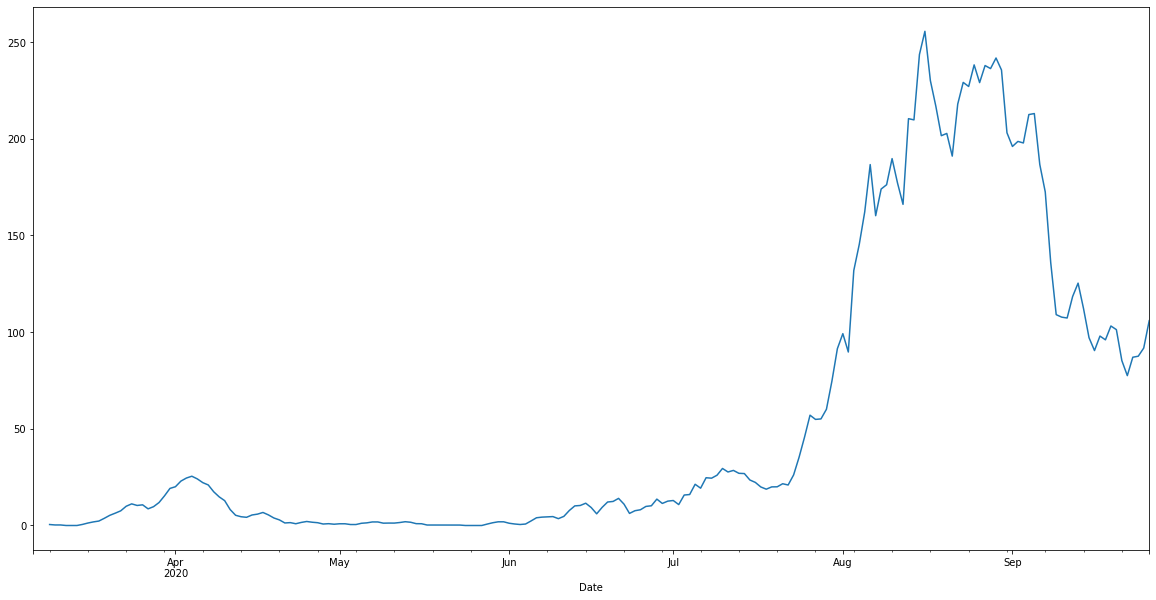

In [12]:
((df["Oahu"]+df["Oahu_Corrected"])/2).rolling(window=4).mean().plot(figsize=(20,10))

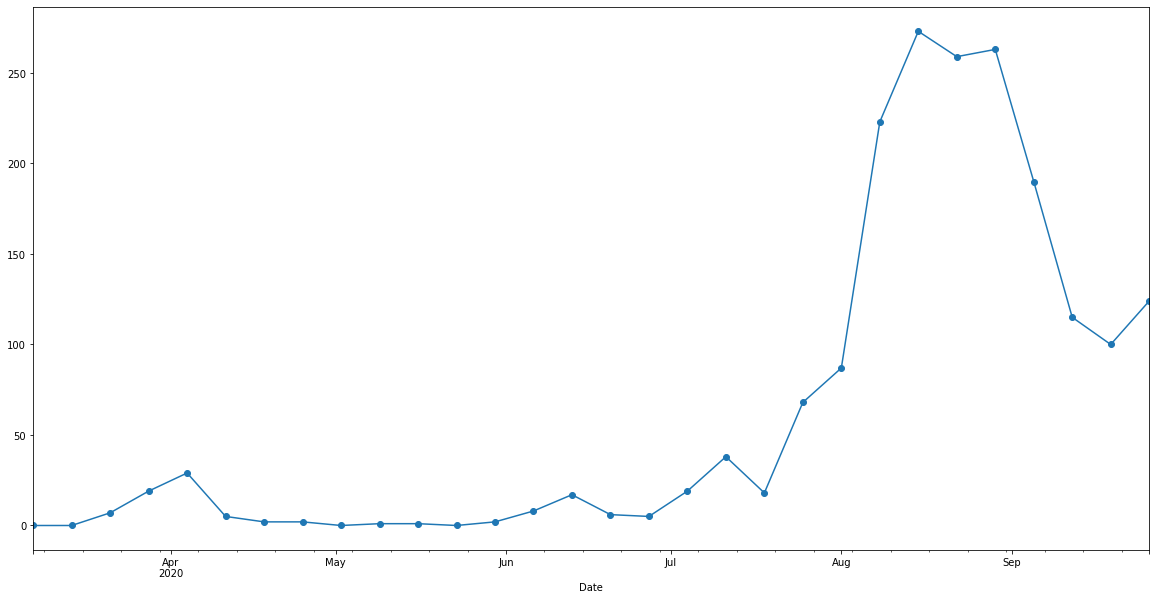

In [13]:
df.loc[(df.weekday == 5),'Oahu'].plot(figsize=(20,10),marker='o');

In [14]:
#extrapolate to next Saturday daily exp rate
pow((df.loc[df.weekday ==5, 'Oahu'][-1]/df.loc[df.weekday ==5, 'Oahu'][-2]),1/7)

1.031207243633429

## maybe interpolate from the better days?

‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

In [15]:
df['interp'] = np.nan
#df.loc[(df.weekday == 5)|(df.weekday==2), 'interp'] = df.loc[(df.weekday == 5)|(df.weekday==2), 'Oahu']
df.loc[(df.weekday == 5), 'interp'] = df.loc[(df.weekday == 5), 'Oahu']

In [16]:
df['interp'].interpolate(method='slinear', inplace=True)
df['interp'].interpolate(method='slinear', fill_value='extrapolate', inplace=True)

In [17]:
df['interp'].tail(14)

Date
2020-09-13    112.857143
2020-09-14    110.714286
2020-09-15    108.571429
2020-09-16    106.428571
2020-09-17    104.285714
2020-09-18    102.142857
2020-09-19    100.000000
2020-09-20    103.428571
2020-09-21    106.857143
2020-09-22    110.285714
2020-09-23    113.714286
2020-09-24    117.142857
2020-09-25    120.571429
2020-09-26    124.000000
Freq: D, Name: interp, dtype: float64

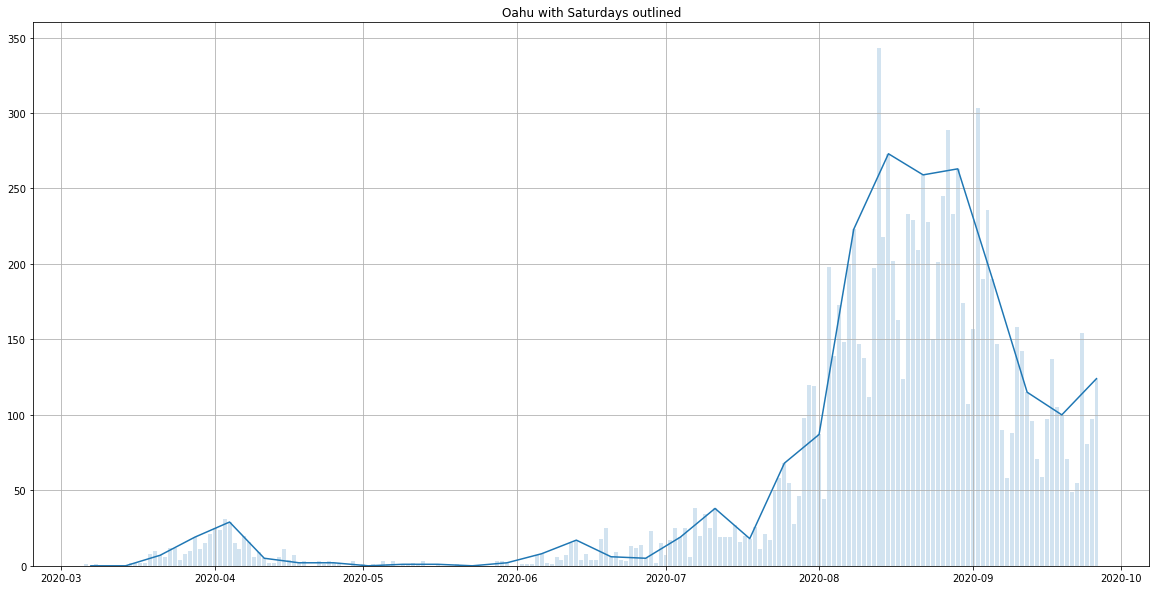

In [18]:
#df[["Oahu","interp"]].plot(figsize=(20,10),title='Oahu, Saturdays smoothed & extrapolated v daily',grid='on');
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(df.index,df['Oahu'],alpha=0.2)
ax.plot(df.index,df['interp'])

ax.grid()
plt.title('Oahu with Saturdays outlined');

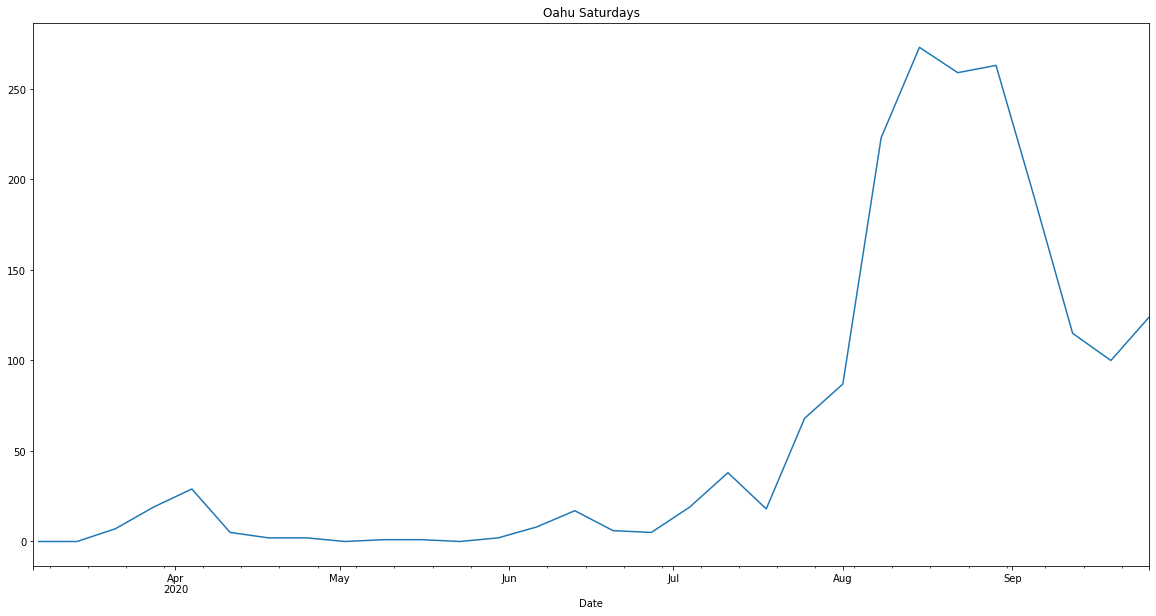

In [19]:
df['interp'].plot(figsize=(20,10), title='Oahu Saturdays');

## Try smoothing / id inflections

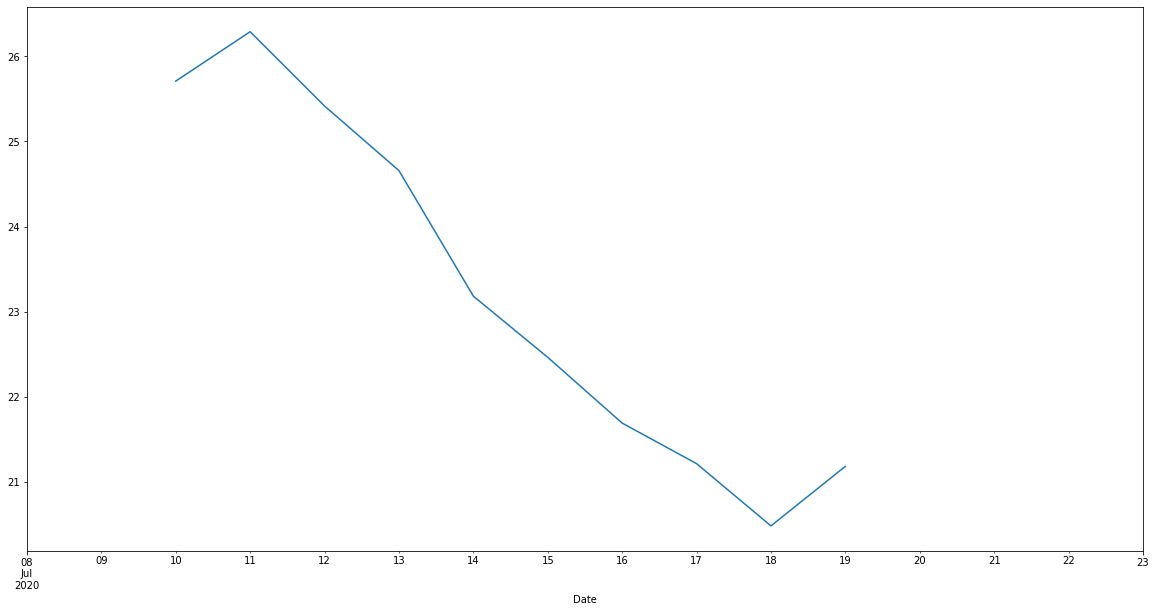

In [20]:
(df['2020-7-8':'2020-7-23']["Oahu"].ewm(span = 7).mean()).rolling(window=7).mean().shift(-4).plot(figsize=(20,10))